# 1.Tải bộ dữ liệu:

In [1]:
! gdown https://drive.google.com/uc?id=1SFWQ7Zi83Gff-RVrlHj0z4Llm1Nq4BBA

Downloading...
From: https://drive.google.com/uc?id=1SFWQ7Zi83Gff-RVrlHj0z4Llm1Nq4BBA
To: /content/titanic_modified_dataset.csv
100% 25.9k/25.9k [00:00<00:00, 29.3MB/s]


# 2.Import libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 3.Read data set:

In [3]:
dataset_path = "titanic_modified_dataset.csv"
df = pd.read_csv(dataset_path, index_col = 0)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
 7   Title     891 non-null    int64  
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.6 KB


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


# 4.Divide dataset to X, y:

In [4]:
dataset_arr = df.to_numpy().astype(np.float64)

X = dataset_arr[:, :-1]
y = dataset_arr[:, -1]
print(X.shape)
print(y.shape)

(891, 8)
(891,)


# 5.Add bias to X feature matrix:

In [5]:
intercept = np.ones((X.shape[0],1))
X_b = np.concatenate((intercept,X),axis=1)

print(X_b.shape)
print(X_b)

(891, 9)
[[ 1.      3.      0.     ...  7.25    0.      0.    ]
 [ 1.      1.      1.     ... 71.2833  1.      1.    ]
 [ 1.      3.      1.     ...  7.925   0.      2.    ]
 ...
 [ 1.      3.      1.     ... 23.45    0.      2.    ]
 [ 1.      1.      0.     ... 30.      1.      0.    ]
 [ 1.      3.      0.     ...  7.75    2.      0.    ]]


# 6.Divide dataset to sub-datasets: train, val, test

In [6]:
#train, val, test: 7:2:1
val_size = 0.2
test_size = 0.125

random_state = 2
isshuffle = True

X_train, X_val, y_train, y_val = train_test_split(X_b, y, test_size=val_size, random_state=random_state, shuffle=isshuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.125, random_state=random_state, shuffle=isshuffle)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(623, 9)
(179, 9)
(89, 9)


# 7.Data standardization:

In [7]:
normalizer = StandardScaler()

X_train[:,1:] = normalizer.fit_transform(X_train[:,1:])
X_val[:,1:] = normalizer.transform(X_val[:,1:])
X_test[:,1:] = normalizer.transform(X_test[:,1:])

print(X_train)

[[ 1.          0.8380325  -0.73366996 ... -0.34812766  0.89679528
  -0.55130115]
 [ 1.         -1.55141486 -0.73366996 ...  1.76556546 -0.60106922
  -0.55130115]
 [ 1.          0.8380325  -0.73366996 ... -0.47988477 -0.60106922
  -0.55130115]
 ...
 [ 1.          0.8380325  -0.73366996 ... -0.48238806  2.39465977
  -0.55130115]
 [ 1.          0.8380325  -0.73366996 ... -0.22655193 -0.60106922
  -0.55130115]
 [ 1.          0.8380325  -0.73366996 ... -0.05432564  2.39465977
   1.3289577 ]]


# 8.Install some important functions:

In [8]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [9]:
def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)
    return y_hat

In [10]:
def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1-1e-7)
    loss = (-y*np.log(y_hat) - (1-y)*np.log(1-y_hat)).mean()
    return loss

In [11]:
def compute_gradient(X, y, y_hat):
    gradient = np.dot(X.T, (y_hat -y))/y.shape[0]
    return gradient

In [12]:
def update_theta(theta, gradient, lr):
    new_theta = theta - lr*gradient
    return new_theta

In [13]:
def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    accuracy = (y_hat == y).mean()
    return accuracy

# 9.Declare hyper-parameters and initialize weights:

In [14]:
lr = 0.01
epochs = 100
batchsize = 16

np.random.seed(random_state) #this function will make the random consistent, easier to debug
theta = np.random.rand(X_train.shape[1])

print(theta.shape)
print(theta)

(9,)
[0.4359949  0.02592623 0.54966248 0.43532239 0.4203678  0.33033482
 0.20464863 0.61927097 0.29965467]


# 10.Train the model

In [15]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_accs = []
    train_batch_losses = []
    val_batch_accs = []
    val_batch_losses = []

    for i in range(0, X_train.shape[0], batchsize):
        X_batch = X_train[i:i+batchsize]
        y_batch = y_train[i:i+batchsize]

        y_hat = predict(X_batch, theta)
        batch_loss = compute_loss(y_hat, y_batch)
        train_batch_losses.append(batch_loss)

        batch_gradient = compute_gradient(X_batch, y_batch, y_hat)
        theta = update_theta(theta, batch_gradient, lr)

        train_accuracy = compute_accuracy(X_train, y_train, theta) #accuracy after update theta
        train_batch_accs.append(train_accuracy)

        #evaluate on valdaition dataset
        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_accuracy = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_accuracy)

    train_batch_acc = np.mean(train_batch_accs)
    train_batch_loss = np.mean(train_batch_losses)
    val_batch_acc = np.mean(val_batch_accs)
    val_batch_loss = np.mean(val_batch_losses)

    train_accs.append(train_batch_acc)
    train_losses.append(train_batch_loss)
    val_accs.append(val_batch_acc)
    val_losses.append(val_batch_loss)

    print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')
    print(f'\t\tTraining acc: {train_batch_acc:.3f}\tValidation acc: {val_batch_acc:.3f}')


EPOCH 1:	Training loss: 0.703	Validation loss: 0.599
		Training acc: 0.656	Validation acc: 0.710

EPOCH 2:	Training loss: 0.670	Validation loss: 0.582
		Training acc: 0.671	Validation acc: 0.715

EPOCH 3:	Training loss: 0.640	Validation loss: 0.567
		Training acc: 0.685	Validation acc: 0.720

EPOCH 4:	Training loss: 0.614	Validation loss: 0.555
		Training acc: 0.699	Validation acc: 0.728

EPOCH 5:	Training loss: 0.592	Validation loss: 0.544
		Training acc: 0.706	Validation acc: 0.744

EPOCH 6:	Training loss: 0.572	Validation loss: 0.535
		Training acc: 0.731	Validation acc: 0.749

EPOCH 7:	Training loss: 0.554	Validation loss: 0.528
		Training acc: 0.747	Validation acc: 0.744

EPOCH 8:	Training loss: 0.539	Validation loss: 0.522
		Training acc: 0.759	Validation acc: 0.748

EPOCH 9:	Training loss: 0.526	Validation loss: 0.517
		Training acc: 0.765	Validation acc: 0.744

EPOCH 10:	Training loss: 0.514	Validation loss: 0.513
		Training acc: 0.770	Validation acc: 0.744

EPOCH 11:	Training

# 11.Data visualization

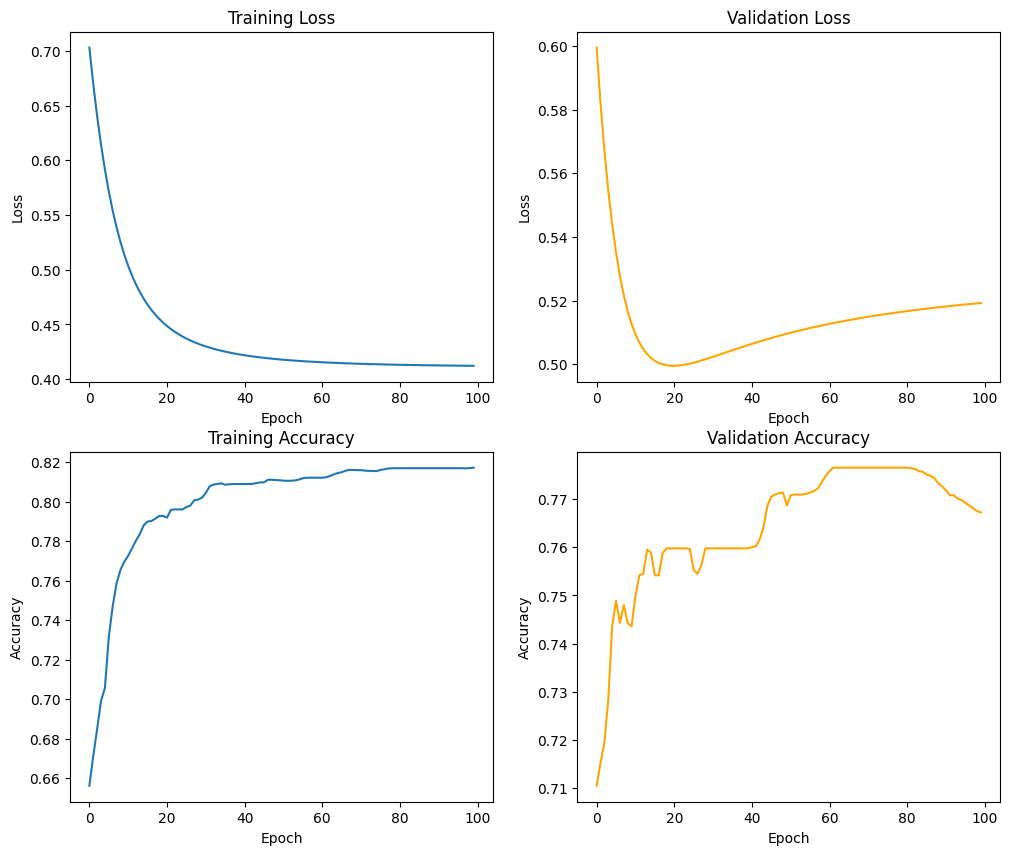

In [16]:
fig, ax = plt.subplots(2, 2, figsize = (12,10))

ax[0,0].plot(train_losses)
ax[0,0].set(xlabel='Epoch', ylabel='Loss')
ax[0,0].set_title('Training Loss')

ax[0,1].plot(val_losses, 'orange')
ax[0,1].set(xlabel='Epoch', ylabel='Loss')
ax[0,1].set_title('Validation Loss')

ax[1,0].plot(train_accs)
ax[1,0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1,0].set_title('Training Accuracy')

ax[1,1].plot(val_accs, 'orange')
ax[1,1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1,1].set_title('Validation Accuracy')

plt.show()

# 12.Evaluate model

In [17]:
val_set_acc = compute_accuracy(X_val , y_val , theta )
test_set_acc = compute_accuracy(X_test , y_test , theta )

print('Evaluation on validation and test set:')
print(f'Accuracy: {val_set_acc}')
print(f'Accuracy: {test_set_acc}')

Evaluation on validation and test set:
Accuracy: 0.770949720670391
Accuracy: 0.7752808988764045
